In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
#data = np.fromfile("song.wav", dtype=np.int16)
data,sr=librosa.load('asd.wav',sr=44100)

In [2]:
data.shape

(88234,)

In [3]:
data=data[0:88200]
length=len(data)
sr=44100
T=1/sr
N=441

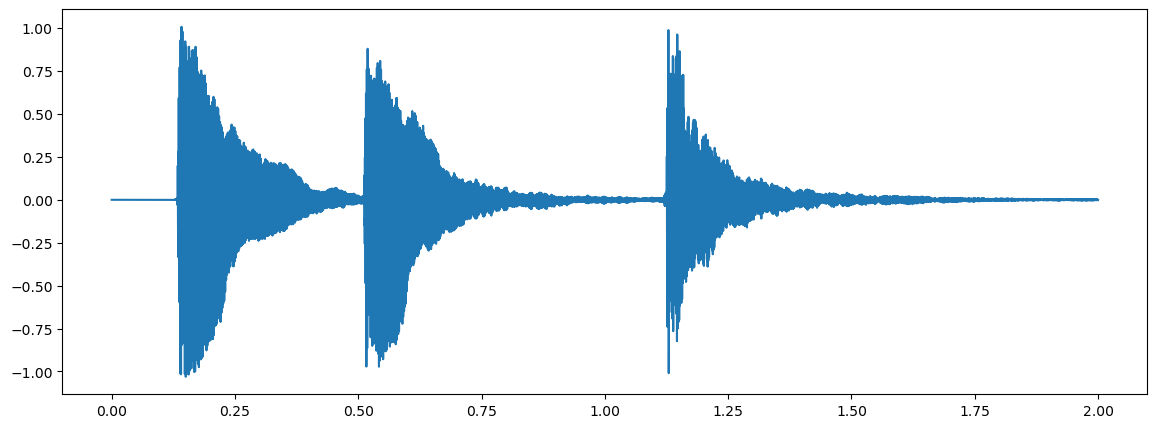

In [4]:
t=np.array(range(0,length)) / sr
plt.figure(figsize=(14,5))
plt.plot(t,data)


In [5]:
ipd.Audio(data,rate=sr)

In [6]:
temp=np.zeros(N)
midi=np.zeros(length//N,dtype=float)
f=np.zeros(length//N,dtype=float)
s_fft=np.zeros(N)
frequency=np.zeros(N)

data1=data[0:N]

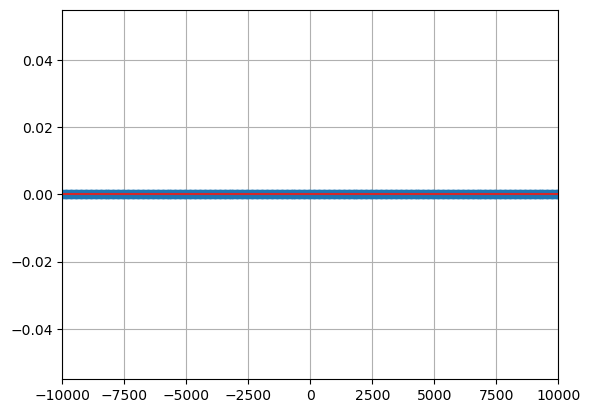

0.0

In [7]:
s_fft = np.fft.fft(data1)
amplitude = abs(s_fft)*(2/len(s_fft))
frequency = np.fft.fftfreq(len(s_fft), T)
idx=np.argmax(amplitude)
freq=frequency[idx]
freq_in_hz=abs(freq)
plt.xlim(-10000, 10000)
plt.stem(frequency, amplitude)
plt.grid(True)
plt.show()
freq_in_hz

Positions and magnitude of frequency peaks:


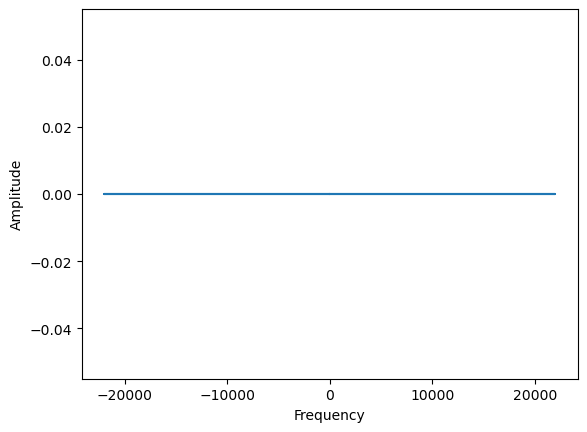

In [8]:
from scipy.signal import find_peaks

s_fft = np.fft.fft(data1)
amplitude = abs(s_fft)
frequency = np.fft.fftfreq(len(s_fft), T)
height_threshold=0.5
# We need a threshold. 


# peaks_index contains the indices in x that correspond to peaks:

peaks_index, properties = find_peaks(amplitude, height=height_threshold)

# Notes: 
# 1) peaks_index does not contain the frequency values but indices
# 2) In this case, properties will contain only one property: 'peak_heights'
#    for each element in peaks_index (See help(find_peaks) )

# Let's first output the result to the terminal window:
print('Positions and magnitude of frequency peaks:')
[print("%4.4f    \t %3.4f" %(frequency[peaks_index[i]], properties['peak_heights'][i])) for i in range(len(peaks_index))]


# Figure-2: The frequencies

plt.plot(frequency,amplitude ,'-', frequency[peaks_index],properties['peak_heights'],'x')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In [9]:
for i in range(0,length-N,N):
    for j in range(0,N):
        temp[j]=data[i+j]
    s_fft = np.fft.fft(temp)
    amplitude = abs(s_fft)*(2/len(s_fft))
    frequency = np.fft.fftfreq(len(s_fft), T)
    idx=np.argmax(amplitude)
    if (idx==0):
        midi[i//N]=0
        continue
    freq=frequency[idx]
    freq_in_hz=abs(freq)
    f[i//N]=freq_in_hz
    midi[i//N]=69+12*round(np.log2(freq_in_hz/440))

In [10]:
midi

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 93., 93.,
       93., 93., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 93.,
       93., 93., 93., 93., 93., 93., 93., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 93., 93., 93., 69., 69., 69., 69., 69., 69., 81., 81., 93.,
       93., 93., 93., 93., 93., 93., 93., 93., 93., 93., 81., 81., 81.,
       93., 93., 81., 81., 93., 93., 93., 81., 81., 81., 81., 81., 81.,
       69., 81., 69., 81., 81., 81., 81., 81., 81., 81., 81., 81., 93.,
       81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81.,
       81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 69

In [14]:
idfty=np.fft.ifft(f)
IDFT_sig=idfty.real-idfty.imag
IDFT_sig

array([ 7.79500000e+02, -8.21688956e+01, -6.95796357e+01,  7.02612672e+01,
       -7.01799904e+01,  9.29405199e+01, -2.66797997e+01,  1.43391906e+00,
       -2.03104303e+01,  2.54724355e+01,  9.77804754e+01, -3.50973343e+01,
       -1.44855516e+01,  3.34420166e+01, -4.00678435e+01,  9.18719052e+01,
       -3.89483978e+01, -4.85242167e+00, -3.67855442e+01,  2.47515315e+01,
        3.63767718e+00, -2.09942323e+01,  1.91992611e+01, -5.02824099e+01,
        1.42702231e+01, -2.02081528e+00,  2.18461832e+01, -1.31278269e+01,
       -1.19464917e+00, -1.48504918e+01,  5.00523494e+00,  8.97252605e+00,
        2.83551020e+01, -5.34644204e+01, -1.92775048e+00,  7.95743994e+00,
        1.03927018e-01, -1.21083622e+01,  7.94039382e+00, -5.13621969e+01,
        3.10714754e+00,  5.07558795e+01, -6.60727670e+01,  2.77435223e+01,
       -5.76116242e+00, -1.13325878e+01,  2.72827133e+01, -2.40258312e+00,
       -2.80298356e+01,  2.73370340e+01, -2.50000000e+00, -1.93028207e+01,
       -7.67772064e+00, -